### Week 9

#### Introduction to SciKit-Learn API

In [9]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
import numpy as np


In [2]:
# Load the palmerpenguins data
df = load_penguins().dropna()

# Outcome (thing we're trying to predict)
y = df.body_mass_g.values

# Predictors (information we're using to predict with)
X = df.filter(['flipper_length_mm','bill_depth_mm']).values

In [3]:
# Instantiate the modeling object
# we always import a class method of the model we'll importing
# thus it is only the instruction, not an instance, so we have to load it into an object
# we can easily change this model class method that's important and the structure will remain the same
model = LinearRegression()

# Fit the model
# will always have a fit method that triggers the model itself
model.fit(X,y)

# Fit statistic (metric for how wrong we are) -- R^2
model.score(X,y)

# Generate a predication (i.e. y-hat)
# 
y_hat = model.predict(X)

In [5]:
# SKLEARN has a bunch of performance metrics that we can then use to evaluate our models.
from sklearn.metrics import mean_squared_error, r2_score
import math

# Sklearn is a huge library, so it is worth pulling only specific pieces so that we know
# what we're pulling in and where methods specifically come in, but also not overload the import

# R^2
r2_score(y,y_hat).round(2)

# Root mean squared error
math.sqrt(mean_squared_error(y,y_hat))

390.86058700975605

#### Preprocessing Data
With model generation becoming so straightforward (relatively speaking, as above), how we handle and prepare the data is now where we spend the bulk of our thoughtful analysis and expertise.

In [7]:
from sklearn import preprocessing as pp

# Visualization
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

# Data
from gapminder import gapminder as gap

In [11]:
np.random.seed(123)
N=1000
# generate two columns of random independent variables
x1 = np.random.normal(0,1,size=N)
x2 = np.random.normal(0,1,size=N)
# add noise to generate a dependent variable
y = x1 + x2 + np.random.normal(0,1,size=N)
ex_dat = pd.DataFrame(dict(y=y,
                           x1 = x1*500, # Scaling x1 by 500
                           x2 = x2))
ex_dat.head()

,y,x1,x2
0,-3.608682,-542.815302,-0.748827
1,0.363563,498.672723,0.567595
2,2.097386,141.489249,0.718151
3,-1.644639,-753.147357,-0.999381
4,-1.624069,-289.300126,0.474898


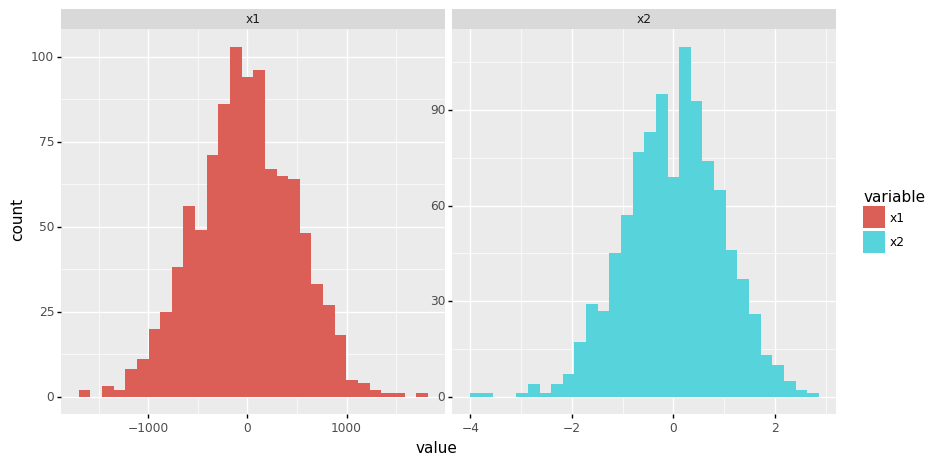

<ggplot: (8779701615607)>

In [12]:
d = ex_dat[['x1','x2']].melt()
(
    ggplot(d,aes(x='value',fill = 'variable')) +
    geom_histogram(bins=30) +
    facet_wrap('variable',scales='free') +
    theme(figure_size = (10,5))
)

# roughly the same shape, but massive difference in scale due to the scaling issue.
# this can create issues in our model, a vanishing gradient, where very small changes
# shifting variables based on different scales can cause problems for trying to optimize

In [13]:
mod = LinearRegression()
mod.fit(ex_dat[['x1','x2']],ex_dat.y)
mod.coef_
# The coefficients on both of these should be 1 by our definition, but because of scale
# X2 is close to 1, but X1 is not at all.

array([0.00193555, 0.98522671])

Preprocessing is a choice we make, not based on the model running the data, but our understanding of it. How we choose to prepare the data is as much a decision we make as much as the 'knobs we turn' when tuning models. The machine learning model is not biased, it is the data that goes into it. 

In [14]:
X = ex_dat[['x1','x2']]
X = pp.scale(X)

mod.fit(X,ex_dat.y)
mod.coef_

# Rescaling the model and both X1, X2 are close to the true value

array([0.96853676, 0.9438566 ])

Standardization

Center the Mean ($\hat{x} = 0$)
Unit variance ($var(x) = 1$)


$$x_{scaled} = \frac{x-\bar{x}}{\sigma_x}$$

In [17]:
#Implementation

X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])



# Initialize the scaling method
## pp holds all the preprocessing methods we have, so we use standard scaler in this instance
scaler = pp.StandardScaler()



# "fit" the method to your data and transform
scaler = scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled



# See that the property holds
X_scaled.mean(axis=0)
X_scaled.var(axis=0)



array([1., 1., 1.])

## Range Scale

- $min(x) = 0$
- $max(x) = 1$

<br>

$$x_{range} = \frac{x-min(x)}{max(x) - min(x)}$$


In [18]:
# Implementation

X_train = np.array([[ 1., -1.,  2.],
                    [ 10.,  8.,  0.],
                    [ -2.,  1., -3.]])

min_max_scaler = pp.MinMaxScaler()
X_range = min_max_scaler.fit_transform(X_train)

X_range

array([[0.25      , 0.        , 1.        ],
       [1.        , 1.        , 0.6       ],
       [0.        , 0.22222222, 0.        ]])

`MaxAbsScaler` works in a very similar fashion to `MinMaxScaler`, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

<br>

$$x_{range} = \frac{x-min(x)}{max(x) - min(x)}$$
$$x_{mars} = x_{range}\cdot(X_{max} - X_{min}) + X_{min}$$

In [19]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 10.,  5.,  0.],
                    [ -2.,  1., -3.]])

max_abs_scaler = pp.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train) # Fit and transform in 1 step

X_train_maxabs


array([[ 0.1       , -0.2       ,  0.66666667],
       [ 1.        ,  1.        ,  0.        ],
       [-0.2       ,  0.2       , -1.        ]])

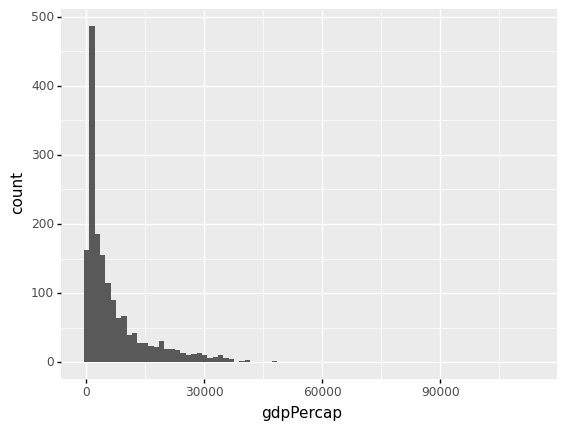

<ggplot: (8779702683456)>

In [20]:
(
    ggplot(gap,aes(x="gdpPercap")) +
    geom_histogram()
 )

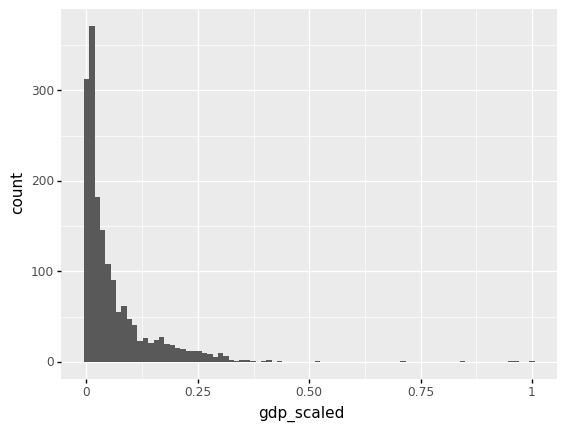

<ggplot: (8779702911997)>

In [21]:
mms = pp.MinMaxScaler()
new = mms.fit_transform(gap.gdpPercap.values.reshape(-1,1))
gap['gdp_scaled'] = new
(
    ggplot(gap,aes(x="gdp_scaled")) +
    geom_histogram()
 )


## Dealing with Categories

- Transform categories, (.e.g `strings`) into numerical data
    + Convert to dummies
    + Convert to ordered scale.

In [22]:
# One Hot Encoder
# Dummy variable feature set for 
enc = pp.OneHotEncoder()

# assign the category data to this array
cat = gap[['country']]

# call it on object instantiated with the fit method
# this results in a OneHotEncoder() class method
enc.fit(cat)
# so we transform the object into
dummy = enc.transform(cat).toarray()
dummy


# Look at it as a data frame
pd.DataFrame(dummy,columns=gap.country.drop_duplicates())



# Recall, pandas also has a method that does this
pd.get_dummies(gap.country)

,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,...,Uganda,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
# Ordinal encoder - When we want to retain information on order

# Example Question data
questions =  [["Disagree","Neutral"],
              ["Agree","Agree"],
              ["Neutral","Disagree"],
              ["Agree","Disagree"]]
questions = pd.DataFrame(questions,columns=["Q1","Q2"])

enc = pp.OrdinalEncoder(categories=[
    ["Disagree","Neutral","Agree"],
    ["Disagree","Neutral","Agree"],
])
ordered_cats = enc.fit_transform(questions)


# Original
questions

# Transformed
ordered_cats

array([[0., 1.],
       [2., 2.],
       [1., 0.],
       [2., 0.]])

### 

In [24]:
from sklearn.model_selection import train_test_split # Train-test split
from sklearn.model_selection import LeaveOneOut # Leave One Out Cross Validation
from sklearn.model_selection import KFold # K-fold Cross validation

In [25]:
# Splitting Data into a training and test data set

y = gap['lifeExp'] # Clarify outcome
X = gap[['gdpPercap','pop']] # Clarify predictors

# Split
# Super important to create the random_state so that we get the same split every time.
splits = train_test_split(X,y,test_size=0.25, random_state=123)


type(splits)
len(splits)

splits[0].shape # Training predictors
splits[1].shape # Test predictors
splits[2].shape # Training outcome
splits[3].shape # test outcome


# unpack all in one step
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123)

# Proportions are split up as expected
X_train.shape[0]/gap.shape[0]
X_test.shape[0]/gap.shape[0]


0.25

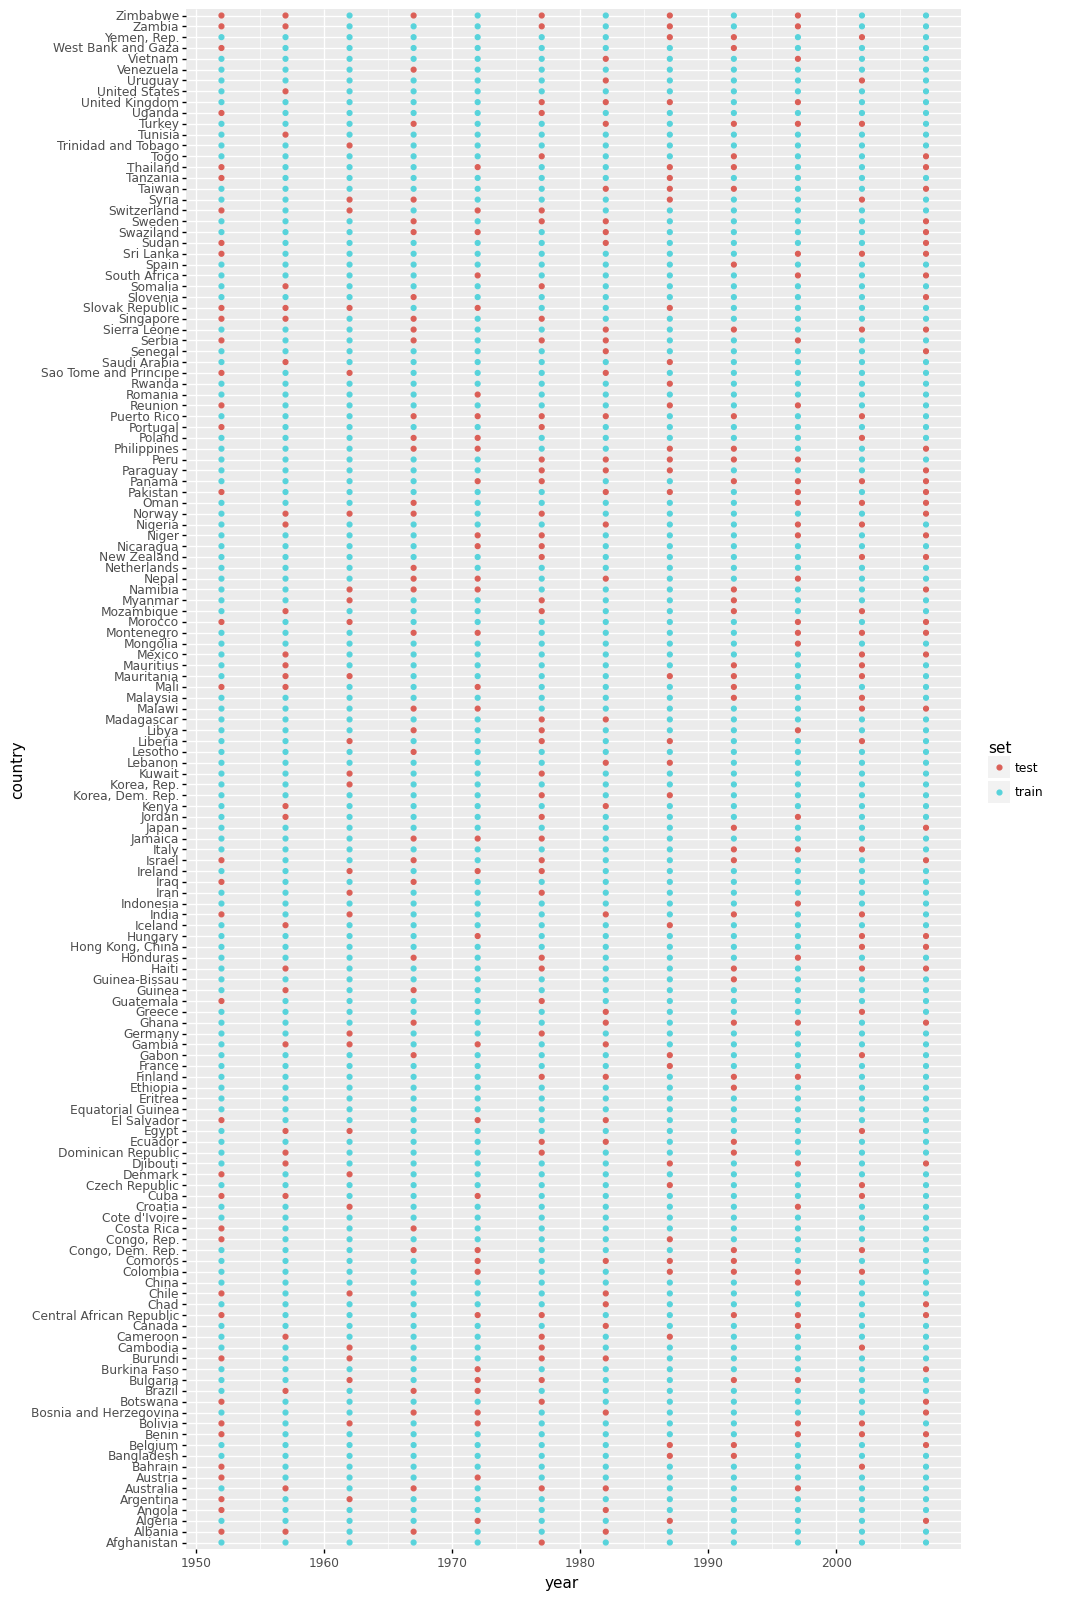

<ggplot: (8779702394161)>

In [26]:
# create new variable set, then subset by this training set
# any data that didnt come from training gets called test dataset
d = (gap.merge(X_train.assign(set = 'train')[['set']],
               left_index=True,right_index=True,how="outer")
     .fillna({'set':'test'}))
# visualization of the random distribution
(
    ggplot(d,aes(x="year",y="country",color="set")) +
    geom_point() +
    theme(figure_size=(10,20))
)

In [27]:
# Leave One Out Cross Validation

# Initialize the splits
loo = LeaveOneOut()

# Split the data
loo_splits = loo.split(X_train)

# Let's look at the splits
n_models =0
for train, test in loo_splits:
    print(f"N Obs. to train on = {train.shape[0]}, N obs to test on = {test.shape[0]}") #
    n_models += 1 # Count the number of models
print(f"Total numbers of models run = {n_models}")




N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test

N Obs. to train on = 1277, N obs to test on = 1
N Obs. to train on = 1277, N obs to test on = 1
Total numbers of models run = 1278


In [28]:

# K-Fold Cross Validation

# Intialize the K-Folds (splits)
kf = KFold(n_splits=5)

# Split the data
k_splits = kf.split(X_train)

# Let's look at the splits
n_models =0
for train, test in k_splits:
    print(f"N Obs. to train on = {train.shape[0]}, N obs to test on = {test.shape[0]}") #
    n_models += 1 # Count the number of models

print(f"Total numbers of models run = {n_models}")




N Obs. to train on = 1022, N obs to test on = 256
N Obs. to train on = 1022, N obs to test on = 256
N Obs. to train on = 1022, N obs to test on = 256
N Obs. to train on = 1023, N obs to test on = 255
N Obs. to train on = 1023, N obs to test on = 255
Total numbers of models run = 5


### Pipelines

In [36]:
from sklearn.compose import ColumnTransformer
import sklearn.metrics as m
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor # Select a model (right now the model doesn't matter)


In [37]:
# Let's predict life expectancy given GDP and population
y = gap['lifeExp'] # Clarify outcome
X = gap[['gdpPercap','pop']] # Clarify predictors

# split data in tuple def
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123)


In [38]:

# Combine preprocessing and model together so all steps are run at once
pipe = Pipeline([('scaler', pp.StandardScaler()), ('dtree', DecisionTreeRegressor())])

# Now we can run everything in one pass
pipe.fit(X_train,y_train)

# Make our prediction
y_hat = pipe.predict(X_train)

# See how we did.
m.mean_squared_error(y_train,y_hat)
m.r2_score(y_train,y_hat)

# How well do we do out of sample?
y_hat = pipe.predict(X_test)
m.mean_squared_error(y_test,y_hat)
m.r2_score(y_test,y_hat)

# Not so great. Over fit.

0.46174579144935

In [39]:
# Fold Cross validation into this process (to estimate the test error using the training data)

kf = KFold(n_splits=5) # Set the number of folds
k_splits = kf.split(X_train) # Create the split generator
scores = [] # Empty list to retain scores

# Loop through the splits, refit the model, and store performance
for train_ind, val_ind in k_splits:

    # Fit Model on the training slits
    pipe.fit(X_train.iloc[train_ind,:],y_train.iloc[train_ind])

    # Predict using the validation splits
    yhat = pipe.predict(X_train.iloc[val_ind,:])

    # Calculate performance scores
    mse = m.mean_squared_error(y_train.iloc[val_ind],yhat)
    r2 = m.r2_score(y_train.iloc[val_ind],yhat)

    # save
    scores.append((mse,r2))


# Convert into DF
dat_scores = pd.DataFrame(scores,columns=["mse","r2"])

# Estimate of test performance
dat_scores.mean(axis=0)


mse    97.045422
r2      0.420332
dtype: float64

In [40]:
# Is there a quicker way to do this??? Yes!

scores_we_care_about = {"r2":"r2",'mse':'neg_mean_squared_error'}
# List of all the relevant keys: m.SCORERS.keys()
# we define the scores here to pass the dictionary into the cross validation method below

# include our model (pipe), X, Y, score, and number of folds for cross-validating
# Use the cross_validation method to validate.
scores = cross_validate(pipe,X=X_train,y=y_train,
                        scoring=scores_we_care_about,
                        cv=5)


# Predicted fit on the test data test error
scores['test_r2'].mean()
-1*scores['test_mse'].mean()

# the above example is only working with one model, but we often want to compare models

# ISSUE: Note there is one issue with the above. If we want to compare the performance
# of different models (which we often want to do), then we need to ensure that
# the splits for each fold are the same across models (else the difference
# in performance between two models might just be statistical fluke given
# how the data was scrambled).

# How do we get around this? Use the KFold generator to generate consistent folds
# that we can use again and again

# By seeding the random state, we can ensure the same folds are generated each time.
# shuffle=True keeps it from statically chopping up the data
gen_folds = KFold(n_splits=5,random_state=111,shuffle=True)

scores = cross_validate(pipe,X=X_train,y=y_train,
                        scoring=scores_we_care_about,
                        cv=gen_folds) # Just drop the generator in for the cv arg


In [42]:
# This code chunk can run 'self-contained' as opposed to the others for an example
# of the start to finish process, with the exception of importing and defining gap

# Can we do better by adding in categorical country information?


y = gap['lifeExp'] # Clarify outcome
X = gap[['country','gdpPercap','pop']] # Clarify predictors

# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123)


# Different preprocessing transformations given different variable types.
numeric_transformer = Pipeline(steps=[('scaler', pp.StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', pp.OneHotEncoder())])

# Combine the different preprocessing instruction, mapping them to specific variables
# Slightly different from a pipeline, we can target specific datatypes with specific transformations
# num, cat are just for internal purposes, it's the selecting of columns that matters
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, ['pop','gdpPercap']),
                  ('cat', categorical_transformer, ['country'])]
    )

# Now put it all together into a single pipeline
# now we pass through the preproces item that we created all with one, and then the model
pipe2 = Pipeline([("preproces",preprocessor), ('dtree', DecisionTreeRegressor())])

# Use the cross_validation method to validate.
scores2 = cross_validate(pipe2,X=X_train,y=y_train,
                        scoring=scores_we_care_about,
                        cv=gen_folds)

# Predicted fit on the test data test error. Country info adds a lot!
scores2['test_r2'].mean()
-1*scores2['test_mse'].mean()

45.31951258859002